# The Mathematics of Aliasing

## How is it that the samples of waveforms having different frequencies come out the same?

Suppose we have a waveform sampled at sampling rate $f_s$, then the period between samples is $\tau_s=1/f_s$. If we sample a sine wave having frequency $f_0$, we get a discrete set of points. We don't have access to the original continuous wave, just the points. Their values are

\begin{align*}
x_n&=A \sin (2\pi n f_0 \tau_s + \phi_0)
\end{align*}

I have included an offset to show that this doesn't make any difference to the end result. Now, suppose the frequency of another wave is $f=f_0+mf_s$, where $m$ is any integer, positive or negative. What happens when you sample this waveform? The samples are

\begin{align*}
x_n^{B}&=A \sin \left( 2\pi n (f_0 + m f_s) \tau_s + \phi_0 \right) \\
&= A\sin\left( 2\pi m f_0 \tau_s + \phi_0 + 2 \pi n m f_s \tau_s \right)
\end{align*}

But $f_s=1/\tau_s$ so we get, using the addition formula $\sin(\alpha+\beta)=\sin\alpha\cos\beta+\cos\alpha\sin\beta$,

\begin{align*}
x_n^{B}&=A\sin\left( 2\pi m f_0 \tau_s + \phi_0 + 2 \pi n m \right) \\
&= A\sin\left(2\pi m f_0 \tau_s + \phi_0\right)\cos(2\pi n m) + A\cos\left(2\pi m f_0 \tau_s + \phi_0\right)\sin(2\pi n m).
\end{align*}

But $\sin(2\pi n m)=0$ because $n$ and $m$ are both integers, and $\cos(2\pi n m)=1$, so 

\begin{align*}
x_n^B&=A\sin\left(2\pi m f_0 \tau_s + \phi_0\right)=x_n.
\end{align*}

Therefore, a sine wave at any of the frequencies $f+mf_s$ has the same samples as the wave at frequency $f$. Hence, sine waves at all these frequencies are equivalent after sampling. This effect is called aliasing. It can be combatted by using a filter before your mixing stage to attenuate out any of the frequencies that you do not want to show up in the samples.


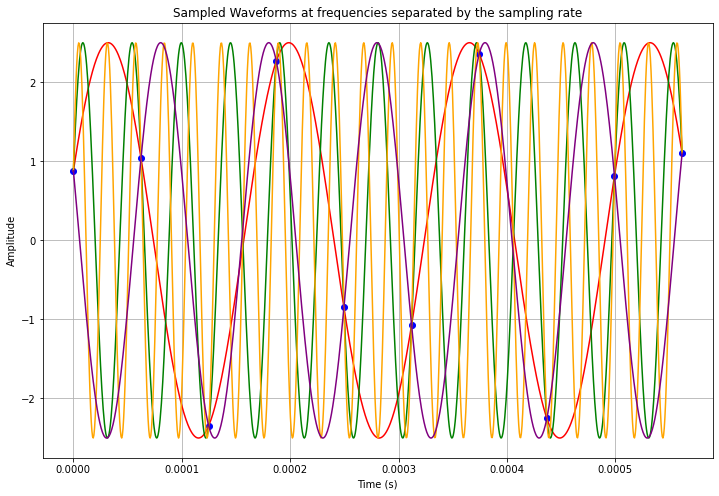

In [1]:
# this code shows that sampling waveforms having frequencies separated by integer multiples of the
# sampling rate yields the same results for the samples. Hence, these frequencies are equivalent to 
# each other in the sampled data set.
#
# Ed Daw, 10th June 2025
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
# this is the frequency of the base waveform.
freq_hz=6000
# this is the rate at which the waveform is sampled
srate_hz=16384
# this is the amplitude of the waveform
amplitude=2.5
# this is the number of periods of the base waveform to be plotted
nperiods=3.37
# this is the amount of time to be appearing on the waveform plot
timeplot=nperiods/freq_hz
# here is a phase shift so you know it wasn't an artifact of the phase
phase_shift=0.36
# this is the rough sampling period used to generate the waveform
ts=1/srate_hz
# this is a vector of time values for the waveform
time=np.linspace(0,timeplot,int(timeplot/ts)+1)
# this is the actual time step between samples - the rounding using int in the
# linspace function induces an alteration in the time step, and we need an accurate one for the loop over samples.
ts=time[1]-time[0]
# now generate the waveform
waveform=amplitude*np.sin(2*np.pi*freq_hz*time+phase_shift)
# now we will generate the same waveform, but sampled at a hundred times the rate of the sampling so that
# what we will see is effectively the 'actual' continuous waveform without the effect of sampling.
oversample_factor=100
srate_oversample=srate_hz*oversample_factor
tsoversample=1/srate_oversample
time_oversample=np.linspace(0, timeplot, int(timeplot/tsoversample)+1)
# accurate sampling rate based on gap between samples in sampled waveform 
srate_hz=1/(time[1]-time[0])
# generate the same 6000 Hz waveform, but sampled at the oversample rate
waveform_oversample=amplitude*np.sin(2*np.pi*freq_hz*time_oversample + phase_shift)
# now generate more two more oversampled waveforms at frequencies of 6000Hz+16384Hz and 6000Hz+2*16384H
fwaveform2=freq_hz + srate_hz
waveform_oversample2=amplitude*np.sin(2*np.pi*fwaveform2*time_oversample + phase_shift)
fwaveform3=freq_hz + 2*srate_hz
waveform_oversample3=amplitude*np.sin(2*np.pi*fwaveform3*time_oversample + phase_shift)
fwaveform4=freq_hz - srate_hz
waveform_oversample4=amplitude*np.sin(2*np.pi*fwaveform4*time_oversample + phase_shift)
# plot the samples and the three waveforms at the oversample rate. Note that at the time of the samples,
# the results for the three waveforms are identical.
plt.figure(figsize=(12, 8))
plt.plot(time, waveform, marker='o', linestyle='', color='blue')
plt.plot(time_oversample, waveform_oversample, '-', color='red')
plt.plot(time_oversample, waveform_oversample2, '-', color='green')
plt.plot(time_oversample, waveform_oversample3, '-', color='orange')
plt.plot(time_oversample, waveform_oversample4, '-', color='purple')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Waveforms at frequencies separated by the sampling rate')
plt.grid(True)
plt.show()




## Frequency domain analysis

In the Frequency domain, where the sampling frequency is far larger than all the wave frequencies, you will get separated peaks for each of the waves. This is demonstrated below. For this example, we use many more periods of the waves, in order to get decent resolution in frequency

Text(0, 0.5, 'Power Spectral Density')

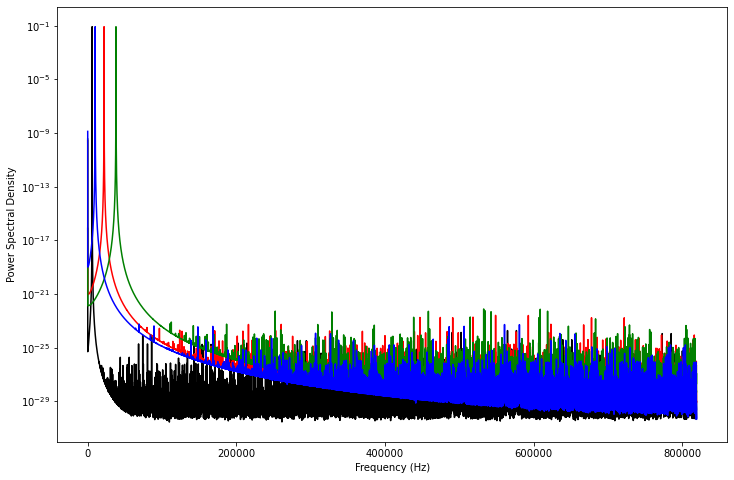

In [2]:
import scipy.signal as signal
time_duration_secs=10
timeaxis=np.linspace(0,time_duration_secs, int(time_duration_secs*srate_oversample))
new_oversample_waveform=amplitude*np.sin(2*np.pi*freq_hz*timeaxis + phase_shift)
new_oversample_waveform_2=amplitude*np.sin(2*np.pi*fwaveform2*timeaxis + phase_shift)
new_oversample_waveform_3=amplitude*np.sin(2*np.pi*fwaveform3*timeaxis + phase_shift)
new_oversample_waveform_4=amplitude*np.sin(2*np.pi*fwaveform4*timeaxis + phase_shift)
# plot the new oversampled waveforms
f,amp=signal.welch(new_oversample_waveform, fs=srate_oversample, nperseg=65536)
f2,amp2=signal.welch(new_oversample_waveform_2, fs=srate_oversample, nperseg=65536)
f3,amp3=signal.welch(new_oversample_waveform_3, fs=srate_oversample, nperseg=65536)
f4,amp4=signal.welch(new_oversample_waveform_4, fs=srate_oversample, nperseg=65536)
plt.figure(figsize=(12, 8))
plt.semilogy(f, amp, 'k')
plt.semilogy(f2, amp2, 'r')
plt.semilogy(f3, amp3, 'g')
plt.semilogy(f4, amp4, 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')

The black waveform was a sine wave at negative frequency of $\rm -10384\,Hz$. This frequency maps to $\rm +10384\,Hz$ in the power spectral density. The other three waves are equally spaced from each other at $\rm 6000\,Hz$, $\rm 22384\,Hz$ and $\rm 38768\,Hz$.

Now let us see what happens when we use welch estimation at a 16384Hz sampling rate on all these waveforms.

Text(0, 0.5, 'Power Spectral Density')

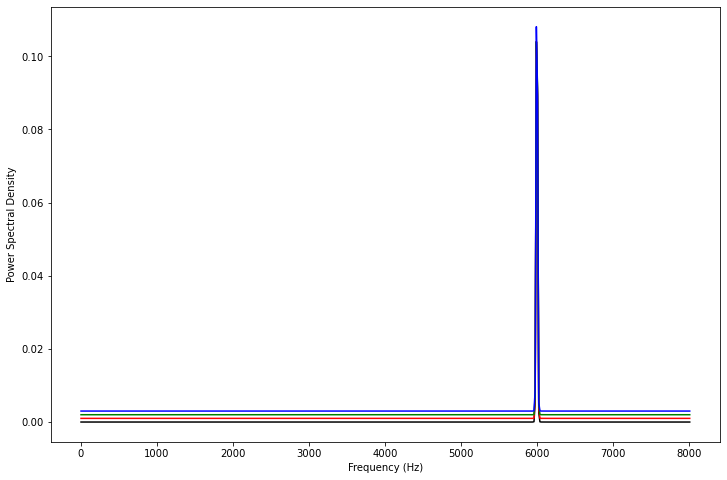

In [3]:
timeaxisslower=np.linspace(0,time_duration_secs, int(time_duration_secs*srate_hz))
new_waveform=amplitude*np.sin(2*np.pi*freq_hz*timeaxisslower + phase_shift)
new_waveform_2=amplitude*np.sin(2*np.pi*fwaveform2*timeaxisslower + phase_shift)
new_waveform_3=amplitude*np.sin(2*np.pi*fwaveform3*timeaxisslower + phase_shift)
new_waveform_4=amplitude*np.sin(2*np.pi*fwaveform4*timeaxisslower + phase_shift)
# get the power spectral density 
f,amp=signal.welch(new_waveform, fs=srate_hz, nperseg=1024)
f2,amp2=signal.welch(new_waveform_2, fs=srate_hz, nperseg=1024)
f3,amp3=signal.welch(new_waveform_3, fs=srate_hz, nperseg=1024)
f4,amp4=signal.welch(new_waveform_4, fs=srate_hz, nperseg=1024)
plt.figure(figsize=(12, 8))
plt.plot(f, amp, 'k')
plt.plot(f2, amp2+0.001*np.ones(len(amp2)), 'r')
plt.plot(f3, amp3+0.002*np.ones(len(amp3)), 'g')
plt.plot(f4, amp4+0.003*np.ones(len(amp4)), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')

Because this time the sampling rate was $\rm 16384\,Hz$, the waveform input frequencies are all separated by integer multiples of $f_s={\rm 16384\,Hz}$, and hence they all end up exhibiting peaks at the same $\rm 6000\,Hz$ frequency in the power spectral density.

# The mathematics of heterodyning

Heterodyning, or mixing, is not so dissimilar from aliasing, is that it is a nonlinear process that in the simplest case just shifts the frequency of the input waveform, and in the general case generates a harmonic series. The basic model is that two signals get multiplied together. There is some standard nomenclature here. The input signal is called the $\rm RF$ signal; generally speaking this signal is in a microwave frequency band. This signal is multiplied by a local oscillator, labelled $\rm LO$, and the result of the multiplication is called the $\rm IF$ signal. IF stands for `intermediate frequency', and refers to a particular application of heterodyning, where the technique is used to 'mix down' a signal initially at a microwave frequency to an intermediate frequency band, where it is easier to do electronic processing on the signal. In a superheterodyne detector, this IF signal may be mixed down again, in which case the output of the second mixer is called the $\rm AF$ signal, for audio frequency. Here you can see the language refers to an application of this technique to AM radio. In the case of AM radio the amplitude of the signal is used to carry an audio frequency signal, a voice or music. Our axion detector electronics is a sophisticated example of a superheterodyne receiver, as we shall see.

We can model heterodyning as multipling the signal by some local oscillator waveform. Though the local oscillator port is usually driven by a sine wave generator, it is over-simplistic to just multiply the RF sine wave by an LO sine wave at a different frequency. Instead, the local oscillator drives, or pumps, some nonlinear component. The result of this pumping is that the RF signal is multiplied by a signal with the same period as the local oscillator, but not necessarily sinusoidal. For example, the local oscillator may result in the switching of a component like a diode on and off, in which case the local oscillator waveform would resemble a square wave. 

In the general case, any period waveform may be expressed as a sum of Fourier components at frequencies that are integer multiples of the local oscillator frequency. The full Fourier series is in general

\begin{align*}
x_{\rm LO}(t)&=a_0 + \sum_{m=1}^\infty a_n\cos(2m\pi f_{\rm LO}t)+b_n\sin(2m\pi f_{\rm LO}t).
\end{align*}

The Fourier coefficients $a_0$, $a_{m>0}$ an $b_{m>0}$ are given by the following formulae that depend on the shape of the periodic waveform that multiplies the RF signal.

\begin{align*}
a_0&=f_{\rm LO}\int_{t=0}^{1/f_{\rm LO}}\,dt\,x_{\rm LO}(t) \\
a_m&=2f_{\rm LO}\int_{t=0}^{1/f_{\rm LO}}\,dt\,x_{\rm LO}(t)\cos(2m\pi f_{\rm LO}t) \\
b_m&=2f_{\rm LO}\int_{t=0}^{1/f_{\rm LO}}\,dt\,x_{\rm LO}(t)\sin(2m\pi f_{\rm LO}t).
\end{align*}

The important point is not the exact values of the coefficients, but that the input periodic wave can be expressed as a Fourier sum of harmonics. Now let us multiply the incoming RF signal by this harmonic series, yielding the ${\rm IF}$ output signal of the mixer. Let the $\rm RF$ input signal be sinusoidal at frequency $f_0$, and modeled as $x_{\rm RF}(t)=A\cos(2\pi f_0 t)$. The resulting $\rm IF$ output is

\begin{align*}
x_{\rm IF}(t)&=A\cos(2\pi f_0 t)\left( a_0 
+ \sum_{m=1}^\infty a_m\cos(2m\pi f_{\rm LO}t)
+b_m\sin(2m\pi f_{\rm LO}t)\right) \\
&=a_0A\cos(2\pi f_0 t) + \sum_{m=1}^\infty Aa_m\cos(2\pi f_0 t)\cos(2\pi m f_{\rm LO} t)
+ Ab_m\cos(2\pi f_0 t)\sin(2\pi m f_{\rm LO}t).
\end{align*}

We use $\cos(\alpha\pm\beta)=\cos\alpha\cos\beta \mp \sin\alpha\sin\beta$ to conclude that
$\cos\alpha\cos\beta=\frac{1}{2}\cos(\alpha-\beta)+\frac{1}{2}\cos(\alpha+\beta)$ and
$\sin\alpha\sin\beta=\frac{1}{2}\cos(\alpha-\beta)-\frac{1}{2}\cos(\alpha+\beta)$. These results
are applied to the expression for the $x_{\rm IF}(t)$, so

\begin{align*}
x_{\rm IF}(t)&=a_0A\cos(2\pi f_0 t) + \\
& A\sum_{m=1}^\infty\left( \frac{a_m}{2}\cos(2\pi (f_0-mf_{\rm LO})t) 
+ \frac{a_m}{2}\cos(2\pi (f_0+mf_{\rm LO})t) \right.\\
&\left. + \frac{b_m}{2}\cos(2\pi (f_0-mf_{\rm LO})t)
- \frac{b_m}{2}\cos(2\pi (f_0+mf_{\rm LO})t)\right) \nonumber \\
&=a_0A\cos(2\pi f_0 t) + A\left(\sum_{m=1}^\infty
\frac{a_m+b_m}{2}\cos(2\pi (f_0-mf_{\rm LO})t) 
+ \frac{a_m-b_m}{2}\cos(2\pi (f_0+mf_{\rm LO})t)\right).
\end{align*}

By inspection, this represents a harmonic series wave at the original $\rm RF$ frequency whose amplitude is proportional to the DC offset in the local oscillator waveform, with a series of peaks evenly spaced apart on either side of this frequency, each adjacent pair of peaks separated by $f_{\rm LO}$. In the simplest case, the local oscillator waveform is sinusoidal at frequency $f_{\rm LO}$, in which case only $a_1$ and/or $b_1$ are non-zero, and $a_0=0$ since the average of a sinusoid over its period is zero. In this case there are only two output harmonics, one at frequency $f_0+f_{\rm LO}$, called the upper sideband, and one at frequency $f_0-f_{\rm LO}$ called the lower sideband. In a further simplification, the upper sideband frequency is often sufficiently high that it is naturally attenuated away by the post-mixer electronics, or a filter is used to attenuate it, or a bit of both. In this case only the lower sideband survives. In this latter case, the effect of heterodyning is to replace the RF signal with one at a much lower frequency, $f_0-f_{\rm LO}$. In the case of QSHS, $f_0$ is the current frequency of the $\rm TM_{010}$ cavity mode, and $f_{\rm LO}$ will be set to be at a frequency $\rm 10.7\,MHz$ below $f_0$. Therefore, the mixer output will move the signal from the frequency neighbourhood of the cavity resonance to be centered at $\rm 10.7\,MHz$, where a hardware bandpass filter will select a frequency band $\rm 2\,MHz$ wide about this central $\rm 10.7\,MHz$ IF frequency. 

## Digital to Analog Conversion and Imaging

The process of converting a series of discrete samples back to an analog signal results in the creation of a harmonic series in the analog output. The process involves a sample and hold circuit, where the discrete samples are used sequentially to set an analog voltage output to a level proportional to the sample value. This value is then held for the sampling period, then the next sample sets the subsequent voltage. This results in a waveform consisting of steps at regular time intervals. This waveform lags the analog waveform by $\tau_s/2$. The step structure also leads to imaging, as we shall now demonstrate.

6.240740740740741e-05
6.105072463768117e-07
16384000 16384000 16384000


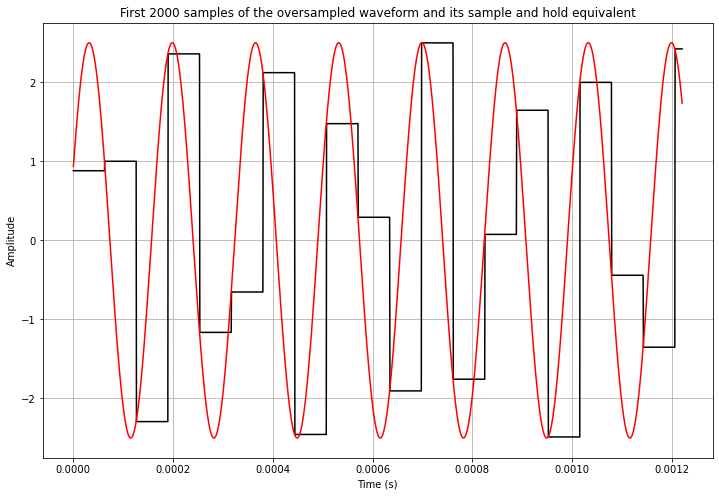

In [4]:
steptime=1/srate_hz
print(steptime)
stepwave=np.zeros(len(new_oversample_waveform))
stepinto=0.0
osccount=0
stepcount=0
stepwave[0]=new_oversample_waveform[0]
tsoversample=time_oversample[1]-time_oversample[0]
print(tsoversample)
for mycount in range(1, len(new_oversample_waveform)-1):
    stepcount=stepcount+1
    if stepinto >= steptime:
        stepwave[stepcount]=new_oversample_waveform[stepcount-1]
        stepinto=0.0
        osccount=osccount+1
    else:
        stepwave[stepcount]=stepwave[stepcount-1]
        stepinto=stepinto+tsoversample
timeoversample=np.linspace(0, time_duration_secs, len(stepwave))
print(len(stepwave), len(timeoversample), len(new_oversample_waveform))
plt.figure(figsize=(12, 8))
plt.plot(timeoversample[1:2000], stepwave[1:2000], 'k')
plt.plot(timeoversample[1:2000], new_oversample_waveform[1:2000], 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('First 2000 samples of the oversampled waveform and its sample and hold equivalent')
plt.grid(True)
plt.show()
    
        

These plots are extracts from the timeseries of a $\rm 6000\,Hz$ sine wave and a $\rm 16384\,Hz$ sample-and-hold running on this wave. Below are the Welch-estimate power spectra of the two waveforms.

Text(0, 0.5, 'Power Spectral Density')

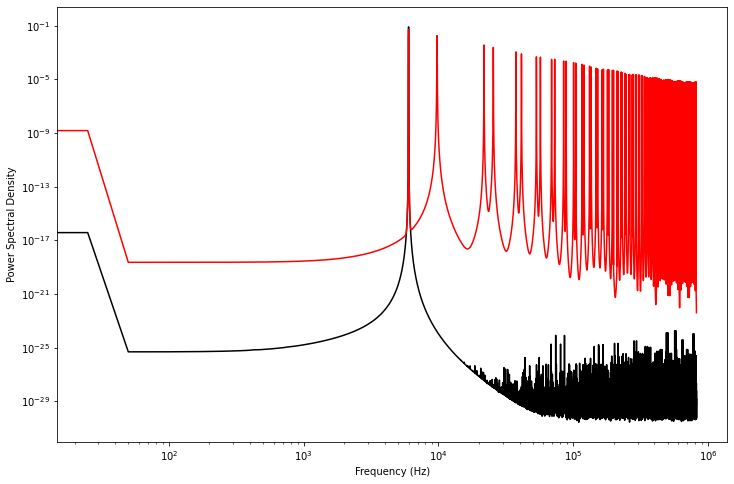

In [15]:
f,amp=signal.welch(new_oversample_waveform, fs=srate_oversample, nperseg=65536)
f_samplehold,amp_samplehold=signal.welch(stepwave, fs=srate_oversample, nperseg=65536)
# sample hold waveform
sincenv=np.zeros(len(amp))
plt.figure(figsize=(12, 8))
plt.loglog(f, amp, 'k')
plt.loglog(f_samplehold, amp_samplehold, 'r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')

The sample-and-hold waveform has doublets in frequency extending up to very high frequency values. This structure is caused by the phenomenon of imaging, which is actually another example of non-linear conversion between frequencies of the same type discussed previously. The peak at $\rm 6000\,Hz$ of the original carrier is preserved. If we subtract the sampling rate of $\rm 16384\,Hz$ from this frequency and take the absolute value we obtain $\rm 10384\,Hz$, which is the position of the second peak. Now add multiples of $\rm 16384\,Hz$ to the doublet at $\rm 6000,10384$ to obtain $\rm 22384,26768$, then $\rm 38768,43152$, and so on. It seems that, once again, imaging generates a set of almost equivalent peaks at the same frequencies that aliasing draws equivalences between. It is perhaps not surprising, since sampling by analog-to-digital converters and sample-and-hold digital-to-analog conversion are closely related, and both involve utilising a sampling frequency. However, in this case we can see that the amplitudes of the harmonics are falling off approximately as
$1/f$ from the primary peak. We can do some analysis to see why this happens.

We first derive an analytic expression for a sample-and-hold waveform of the type plotted in the figure. We use $\theta$ functions to do this, where $\theta(x-x_0)$ is $1$ for $x\ge x_0$ and $0$ for $x<x_0$. This allows us to write down the sample-and-hold waveform,
\begin{align*}
x_{\rm SH}(t)&=\sum_{m=-\infty}^{+\infty}\left(\theta(t-m\tau_s)-\theta(t-(m+1)\tau_s)\right)x_m
\end{align*}
where $x_m$ is the $m^{\rm th}$ sample of the digitised waveform. The difference between theta functions is zero before $t=m\tau_s$ and after $t=(m+1)\tau_s$. Multiplying by $x_m$ generates a flat line of height $x_m$ in this time interval, and zero at all other times. Summing over all $m$ then generates the entire sample-and-hold waveform. We now take the Fourier transform of this waveform
\begin{align*}
\tilde{X}_{\rm SH}(\omega)&=\frac{1}{\sqrt{2\pi}}\int\,dt\,e^{-i\omega t}
\sum_{m=-\infty}^{+\infty}\left(\theta(t-m\tau_s)-\theta(t-(m+1)\tau_s)\right)x_m \\
&=\frac{1}{\sqrt{2\pi}}\sum_{m=-\infty}^{+\infty}x_m\int_{t=m\tau_s}^{t=(m+1)\tau_s}\,dt\,e^{-i\omega t} \\
&=\frac{1}{\sqrt{2\pi}}\tau_s e^{\frac{i\omega\tau_s}{2}}
{\rm sinc}\left(\frac{\omega\tau_s}{2}\right)
\sum_{m=-\infty}^{+\infty}x_me^{-i\omega m \tau_s}
\end{align*}
Between the first and the second line, the difference between $\theta$ functions has been used to restrict the domain of the Fourier transform integral, and the elements dependent on $m$ but independent of $t$ have been moved out of the integral, which can then be carried out. We have also made use of the identity $\sin\theta=(e^{i\theta}-e^{-i\theta})/(2i)$.

Notice that the sum over $m$ has become a discrete time Fourier transform (DTFT) of the digitised data samples. Referring back to the first section on aliasing, we know that this sum implies an equivalence between the frequencies where there are peaks, those at the modulus of the sine wave frequency plus and minus all integer multiples of the sampling rate. We call the appearance of these peaks in the analog converted data imaging. The new feature is that the amplitude of the peaks is falling off as the reciprocal of the frequency. This is explained by the $\rm sinc$ function modulating the DTFT, which has zeros at $f=f_s=1/\tau_s$, and falls as $1/(\omega\tau_s)$, which explains the fall-off in amplitude of the imaged peaks with frequency. Notice also the appearance of the $\exp (i\omega\tau_s/2)$, representing the phase shift in a time delay of one half sample. You can see from the time domain waveform plot why you would predict such a time delay, since the sample-and-hold waveform is timeshifted with respect to the samples.

The figure below has the $\rm sinc^2(\pi f\tau_s)$ waveform superposed in green on the power spectrum of the sample-and-hold analog data. The square is there because the power spectrum is the modulus of the Fourier transform squared. You can see that the envelope fits well with the peaks.

Text(0, 0.5, 'Power Spectral Density')

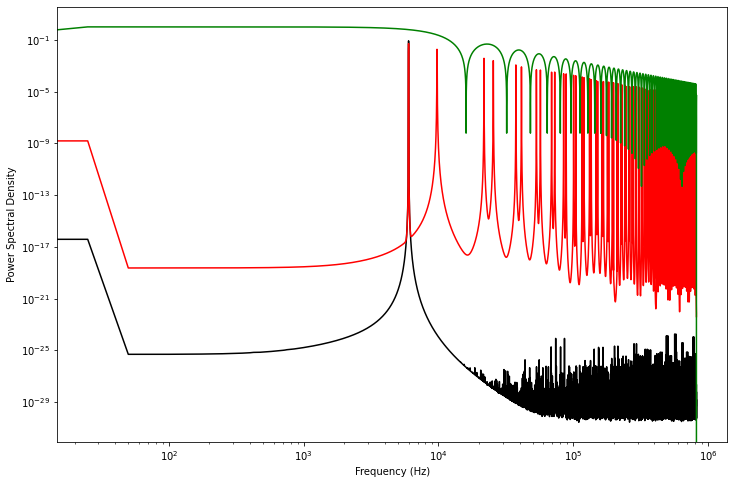

In [14]:
# sinc squared envelope waveform
sincenv=np.zeros(len(amp))
for scount in range(1, len(amp)-1):
    sincenv[scount]=np.sin(np.pi*f[scount]*steptime)*np.sin(np.pi*f[scount]*steptime)/(np.pi*np.pi*f[scount]*f[scount]*steptime*steptime)
plt.figure(figsize=(12, 8))
plt.loglog(f, amp, 'k')
plt.loglog(f_samplehold, amp_samplehold, 'r')
plt.loglog(f,sincenv, 'g')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')